In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
import random

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,SeparableConv2D, BatchNormalization,Dropout, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [0]:
DATADIR = "/content/drive/My Drive/chest_xray/"
CATEGORIES = ["Normal","Viral","Bacterial"]

hot_encoding = np.array([0, 1, 2])

IMG_SIZE = 200

In [0]:
def create_training_data(cat_path):
  training_data = []
  i = 0
  for idx,category in enumerate(["NORMAL","PNEUMONIA"]):
    new_path = cat_path + "/" + category
    path = os.path.join(DATADIR,new_path)
    for img in os.listdir(path):
      print("%d th image" %i)
      try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                
        if ("bacteria" in img):
          training_data.append([new_array,(hot_encoding == idx+1).astype(int)])
        else:
          training_data.append([new_array,(hot_encoding == idx).astype(int)])
        i = i+1  
      except Exception as e:
        return 0
  return training_data

In [6]:
training_data = create_training_data("train")

Streaming output truncated to the last 5000 lines.
231 th image
232 th image
233 th image
234 th image
235 th image
236 th image
237 th image
238 th image
239 th image
240 th image
241 th image
242 th image
243 th image
244 th image
245 th image
246 th image
247 th image
248 th image
249 th image
250 th image
251 th image
252 th image
253 th image
254 th image
255 th image
256 th image
257 th image
258 th image
259 th image
260 th image
261 th image
262 th image
263 th image
264 th image
265 th image
266 th image
267 th image
268 th image
269 th image
270 th image
271 th image
272 th image
273 th image
274 th image
275 th image
276 th image
277 th image
278 th image
279 th image
280 th image
281 th image
282 th image
283 th image
284 th image
285 th image
286 th image
287 th image
288 th image
289 th image
290 th image
291 th image
292 th image
293 th image
294 th image
295 th image
296 th image
297 th image
298 th image
299 th image
300 th image
301 th image
302 th image
303 th image


In [7]:
print(len(training_data))

5230


In [0]:
random.shuffle(training_data)
random.shuffle(training_data)

In [0]:
def separate_io(data):
  X = []
  y = []
  for features,label in data:
    X.append(features)
    y.append(label)

  X = np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE,1)
  print(X.shape)
  X = X/255.0

  y = np.array(y)
  print(y.shape)

  return X,y


In [10]:
X,y = separate_io(training_data)

(5230, 200, 200, 1)
(5230, 3)


In [0]:
model = Sequential()

model.add(Conv2D(input_shape=X.shape[1:],filters=64,kernel_size=(3,3),padding="same", activation="relu", name='Conv1_1'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_2'))
model.add(MaxPooling2D((2,2), name='pool1'))
    
model.add(SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_1'))
model.add(SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_2'))
model.add(MaxPooling2D((2,2), name='pool2'))
    
model.add(SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_1'))
model.add(BatchNormalization(name='bn1'))
model.add(SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_2'))
model.add(BatchNormalization(name='bn2'))
model.add(SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_3'))
model.add(MaxPooling2D((2,2), name='pool3'))
    
model.add(SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_1'))
model.add(BatchNormalization(name='bn3'))
model.add(SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_2'))
model.add(BatchNormalization(name='bn4'))
model.add(SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_3'))
model.add(MaxPooling2D((2,2), name='pool4'))
    
model.add(Flatten(name='flatten'))
model.add(Dense(1024, activation='relu', name='fc1'))
model.add(Dropout(0.7, name='dropout1'))
model.add(Dense(512, activation='relu', name='fc2'))
model.add(Dropout(0.5, name='dropout2'))
model.add(Dense(3, activation='softmax', name='fc3'))
    
    

In [45]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1_1 (Conv2D)             (None, 200, 200, 64)      640       
_________________________________________________________________
Conv1_2 (Conv2D)             (None, 200, 200, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 100, 100, 64)      0         
_________________________________________________________________
Conv2_1 (SeparableConv2D)    (None, 100, 100, 128)     8896      
_________________________________________________________________
Conv2_2 (SeparableConv2D)    (None, 100, 100, 128)     17664     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 50, 50, 128)       0         
_________________________________________________________________
Conv3_1 (SeparableConv2D)    (None, 50, 50, 256)      

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

hist = model.fit(X,y,epochs=100,batch_size=32,validation_split=0.20,callbacks=[checkpoint,early])

Epoch 1/100
131/131 [==============================] - ETA: 0s - loss: 1.0628 - accuracy: 0.4749
Epoch 00001: val_accuracy improved from -inf to 0.49618, saving model to vgg16_1.h5
131/131 [==============================] - 59s 451ms/step - loss: 1.0628 - accuracy: 0.4749 - val_loss: 1.0584 - val_accuracy: 0.4962
Epoch 2/100
131/131 [==============================] - ETA: 0s - loss: 0.8547 - accuracy: 0.6102
Epoch 00002: val_accuracy did not improve from 0.49618
131/131 [==============================] - 51s 393ms/step - loss: 0.8547 - accuracy: 0.6102 - val_loss: 1.1162 - val_accuracy: 0.4962
Epoch 3/100
131/131 [==============================] - ETA: 0s - loss: 0.6406 - accuracy: 0.7237
Epoch 00003: val_accuracy did not improve from 0.49618
131/131 [==============================] - 51s 391ms/step - loss: 0.6406 - accuracy: 0.7237 - val_loss: 1.1453 - val_accuracy: 0.4962
Epoch 4/100
131/131 [==============================] - ETA: 0s - loss: 0.5746 - accuracy: 0.7459
Epoch 00004: val

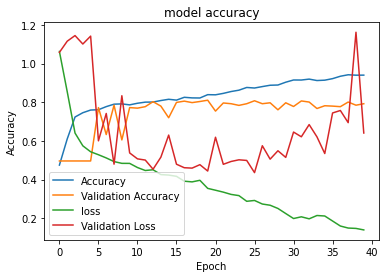

In [49]:

plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [50]:
test_data = create_training_data("test")

0 th image
1 th image
2 th image
3 th image
4 th image
5 th image
6 th image
7 th image
8 th image
9 th image
10 th image
11 th image
12 th image
13 th image
14 th image
15 th image
16 th image
17 th image
18 th image
19 th image
20 th image
21 th image
22 th image
23 th image
24 th image
25 th image
26 th image
27 th image
28 th image
29 th image
30 th image
31 th image
32 th image
33 th image
34 th image
35 th image
36 th image
37 th image
38 th image
39 th image
40 th image
41 th image
42 th image
43 th image
44 th image
45 th image
46 th image
47 th image
48 th image
49 th image
50 th image
51 th image
52 th image
53 th image
54 th image
55 th image
56 th image
57 th image
58 th image
59 th image
60 th image
61 th image
62 th image
63 th image
64 th image
65 th image
66 th image
67 th image
68 th image
69 th image
70 th image
71 th image
72 th image
73 th image
74 th image
75 th image
76 th image
77 th image
78 th image
79 th image
80 th image
81 th image
82 th image
83 th image
84

In [51]:
test_X,test_y = separate_io(test_data)

(624, 200, 200, 1)
(624, 3)


In [52]:
test_loss, test_score = model.evaluate(test_X, test_y, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

20/20 [==============================] - 2s 110ms/step - loss: 2.0459 - accuracy: 0.6298
Loss on test set:  2.045903205871582
Accuracy on test set:  0.629807710647583


In [0]:
prediction = model.predict(test_X, batch_size=32)
prediction = np.argmax(prediction, axis=-1)

orig_labels = np.argmax(test_y, axis=-1)

In [60]:
print(prediction[500])
print(orig_labels[500])

1
1


<Figure size 432x288 with 0 Axes>

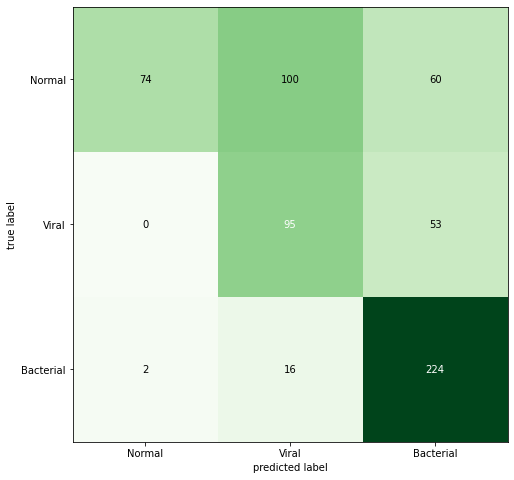

In [78]:
cm  = confusion_matrix(orig_labels, prediction)

plt.figure()
plot_confusion_matrix(cm,figsize=(12,8),cmap=plt.cm.Greens)
plt.xticks(range(3), CATEGORIES, fontsize=10)
plt.yticks(range(3), CATEGORIES, fontsize=10)
plt.show()

In [80]:
cm.ravel()

array([ 74, 100,  60,   0,  95,  53,   2,  16, 224])